In [1]:
import numpy as np
import pickle

with open("txt_data", "rb") as fp:   #Pickling
    data = pickle.load(fp)
with open("txt_labels", "rb") as fp:   #Pickling
    labels = pickle.load(fp)
    
print(len(data), len(labels))

31702 31702


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=500, use_idf=True, stop_words='english')
vectorizer.fit(data)
x_train = vectorizer.transform(data).toarray()
print('> tfidVectorization done.')

> tfidVectorization done.


In [3]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import glob
import numpy as np

In [4]:
names = []
classifiers = []
for files in glob.glob('CLF*'):
    with open(files, 'rb') as f:
        classifiers.append(pickle.load(f))
        names.append(files.split('/')[-1])
        
print(classifiers)
print(names)

[SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False), SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False), KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform'), AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                            

In [5]:
scores = []
for model in classifiers:
    score = cross_val_score(model, x_train, labels, cv=10, n_jobs=-1, verbose=1)
    #print(score)
    scores.append(score)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 23.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 32.9min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  3.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  9.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.1

In [9]:
colors = ['red','blue','black','green','yellow','pink','orange']

import pickle
with open('ANN_score','rb') as f:
    ANNscore = pickle.load(f)
scores.append(ANNscore)
names.append('CLF_ANN')
colors.append([102/255.0, 0., 102/255.0])

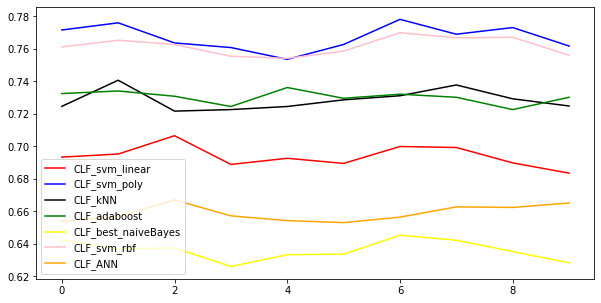

In [11]:
plt.figure(figsize=(10,5))
for score,name,color in zip(scores,names,colors):
    plt.plot(score, label=name, c=color)
plt.legend(loc='lower left')
plt.show()